In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir())  # Check if "ecommerce_customers.csv" is in this list

['.virtual_documents']


In [3]:
import os
print(os.listdir("/kaggle/input"))

['ecommerce-customers', 'd']


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('done')  # Verify data loads correctly 

done


In [25]:
import pandas as pd

file_path = "/kaggle/input/ecommerce-customers/Ecommerce Customers.csv"
df = pd.read_csv(file_path)
df.info()  # To verify the data loads correctly

print(ecommerce_customers.head())  # Verify data loads correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 

In [15]:
print(ecommerce_customers.isnull().sum())  # Check for missing values

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [26]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [27]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

print('done')  # Verify data loads correctly 

done


In [28]:
corr_matrix = df_encoded.corr()

print('done')  # Verify data loads correctly 

done


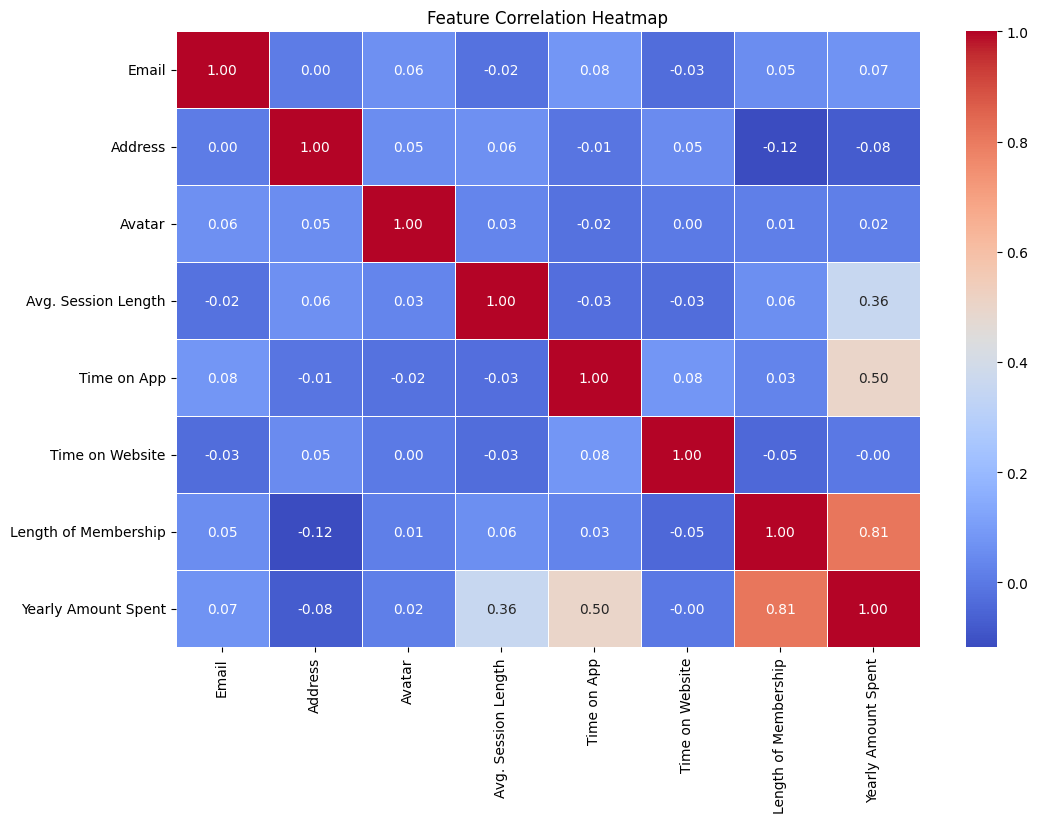

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/kaggle/working/feature_correlation_heatmap.png", dpi=300)
plt.show()

In [32]:
correlation_matrix = df_encoded.corr()

print('done') #Verify data loads correctly

done


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


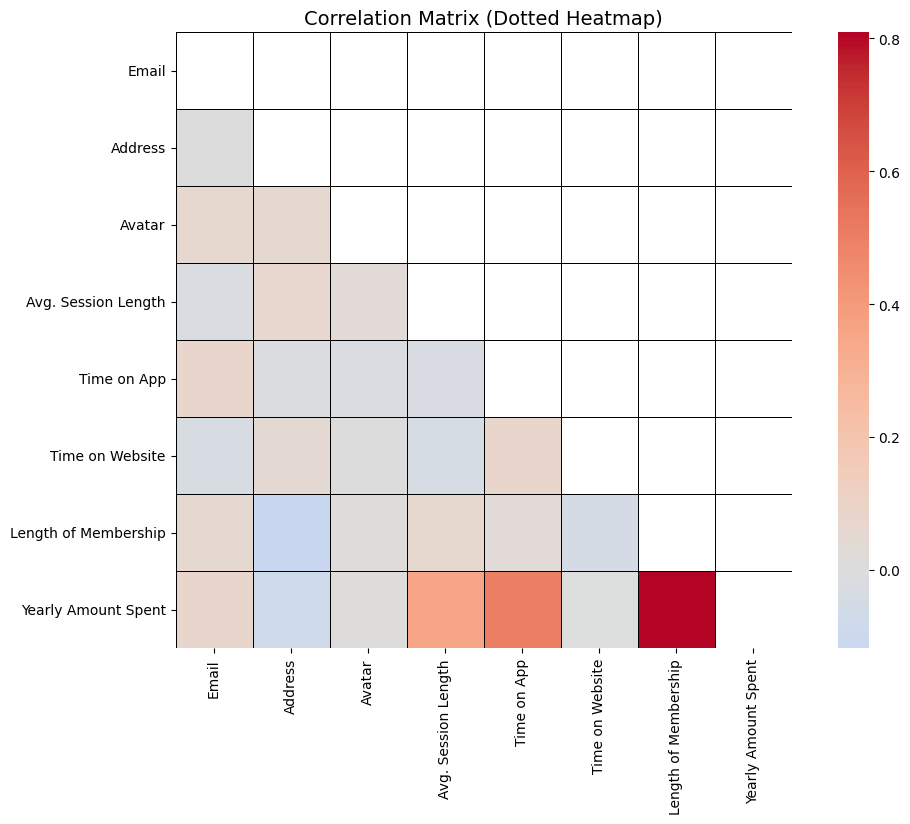

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5, linecolor='black', 
            cbar=True, fmt=".2f", center=0, square=True, mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)))

plt.title("Correlation Matrix (Dotted Heatmap)", fontsize=14)
plt.savefig("/kaggle/working/correlation_matrix_dotted_heatmap.png", dpi=300)
plt.show()

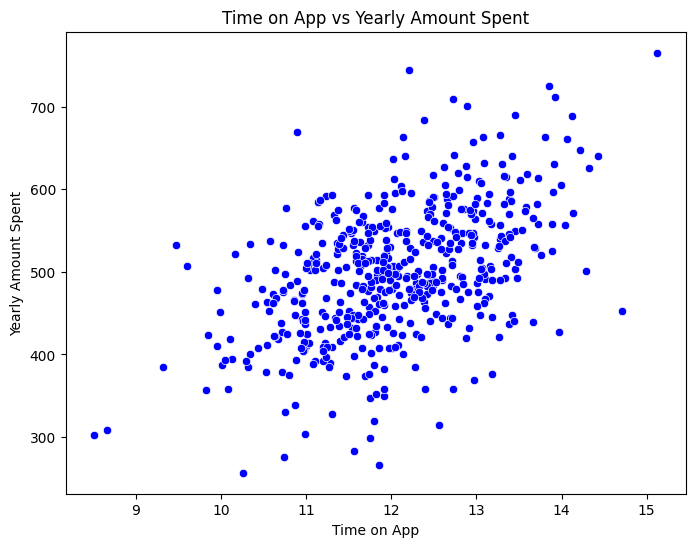

In [36]:
# Scatterplot for Time on App vs Yearly Amount Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ecommerce_customers['Time on App'], 
                y=ecommerce_customers['Yearly Amount Spent'], 
                color='blue')

plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.savefig("/kaggle/working/time_on_app_vs_spending.png", dpi=300)
plt.show()

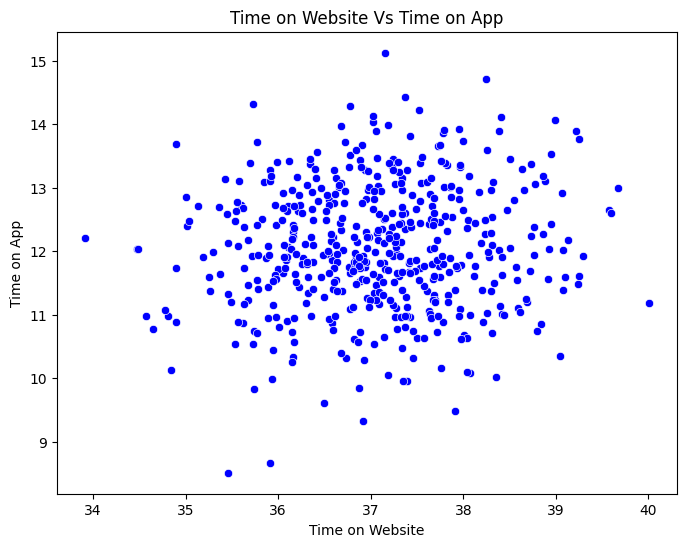

In [38]:
# Scatterplot for Time on App vs Time on Website
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ecommerce_customers['Time on Website'], 
                y=ecommerce_customers['Time on App'], 
                color='blue')

plt.title('Time on Website Vs Time on App')
plt.xlabel('Time on Website')
plt.ylabel('Time on App')
plt.savefig("/kaggle/working/time_on_website_vs_time_on_app.png", dpi=300)
plt.show()